# Project 17

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from IPython.display import clear_output
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
%cd /home/aloysius/repos/Code \and \Dataset/Dataset
!ls

/home/aloysius/repos/Code and Dataset/Dataset
 daily_chart	        login_trades_symbol.csv		       README.md
 daily_report.csv       login_trades_symbol_updated.csv        reason.csv
 daily_report_DPM.csv   login_trades_symbol_updated_tpsl.csv   symbol.csv
 login.csv	        login_trades_usd.csv		       trades.csv
 login_report_usd.csv  'Modelling 2.ipynb'		       Untitled.ipynb


/home/aloysius/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Data Samples

### Trades.csv

In [3]:
trades = pd.read_csv("trades.csv")
trades['open_time'] = pd.to_datetime(trades['open_time'], unit = "s")
trades['close_time'] = pd.to_datetime(trades['close_time'], unit = "s")
trades.head()

,ticket,login,symbol,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,68880703,7062462,XAUUSD,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,-1.12,10.83,3994.36
1,68880910,7062462,XAUUSD,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,-2.25,23.16,7986.12
2,68120690,813125,US2000,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,105.42,39799.00
3,68169249,813125,US2000,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,-7.21,485.26,79042.60
4,68186877,88945036,NZDUSD,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,0.00,33.15,15909.27


### daily_report.csv

In [4]:
daily_report = pd.read_csv("daily_report.csv")
daily_report.head()

,login,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
0,457547,2023-01-01,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,474589,2023-01-01,0.0,0.56,0.56,0.0,0.0,0.0,0.0
2,504321,2023-01-01,0.0,2.03,2.03,0.0,0.0,0.0,0.0
3,504322,2023-01-01,0.0,0.51,0.51,0.0,0.0,0.0,0.0
4,504326,2023-01-01,0.0,0.01,0.01,0.0,0.0,0.0,0.0


### login.csv

In [5]:
login = pd.read_csv("login.csv")
login['reg_date'] = pd.to_datetime(login['reg_date'],unit='s')
login.head()

,login,country,account_currency,reg_date
0,457547,Romania,EUR,2021-02-25 00:15:32
1,474589,CA,CAD,2021-01-07 02:44:02
2,504321,CA,CAD,2020-10-14 02:31:50
3,504322,CA,USD,2020-10-15 04:35:45
4,504326,CA,USD,2020-10-19 07:39:12


### symbol.csv

In [6]:
symbol = pd.read_csv("symbol.csv")
symbol.head()

,symbol,description,type
0,ALUMINIUM,Aluminium vs US Dollar,Commodity
1,COPPER,Copper vs US Dollar,Commodity
2,GAS,Natural Gas vs US Dollar,Commodity
3,LEAD,Lead vs US Dollar,Commodity
4,NICKEL,Nickel vs US Dollar,Commodity


### reason.csv

In [7]:
reason = pd.read_csv("reason.csv")
reason.head()

,code,reason
0,0,Client
1,1,Expert
2,2,Dealer
3,3,Signal
4,4,Gateway


### one of the daily charts

In [8]:
directory = "daily_chart"
daily_chart = {}
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    daily_chart[filename.replace(".csv","")] = pd.read_csv(f)

In [9]:
daily_chart["USDPLN"].head()

,date,close
0,2023.01.03 00:00,4.43075
1,2023.01.04 00:00,4.39765
2,2023.01.05 00:00,4.45195
3,2023.01.06 00:00,4.40495
4,2023.01.09 00:00,4.37275


## Initial Visualisation

### Account Currency Count

<Axes: title={'center': 'Account Currency Counts'}, xlabel='Currency', ylabel='Frequency'>

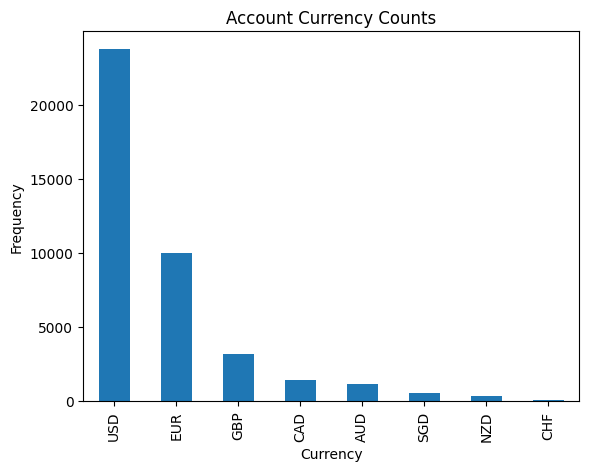

In [10]:
login["account_currency"].value_counts().plot(kind="bar", title = "Account Currency Counts", xlabel = "Currency", ylabel = "Frequency")

### Registered Date Distribution

<Axes: >

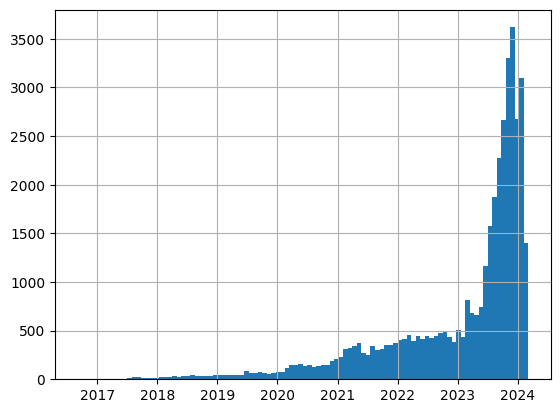

In [11]:
login["reg_date"].hist(bins=100)

### Top Products being traded

<Axes: title={'center': 'Top 30 mostly traded symbol'}, xlabel='Symbol', ylabel='Frequency'>

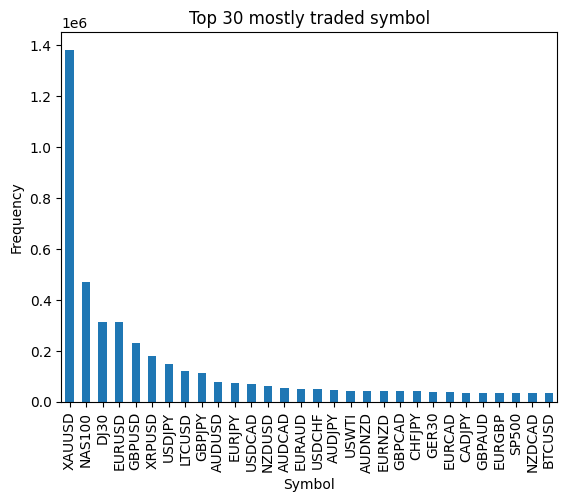

In [12]:
trades["symbol"].value_counts().iloc[:30].plot(kind = "bar", title = "Top 30 mostly traded symbol", xlabel = "Symbol", ylabel = "Frequency")

### Buy and Sell Count

<Axes: title={'center': 'Buy/Sell Counts'}, xlabel='Action', ylabel='Frequency'>

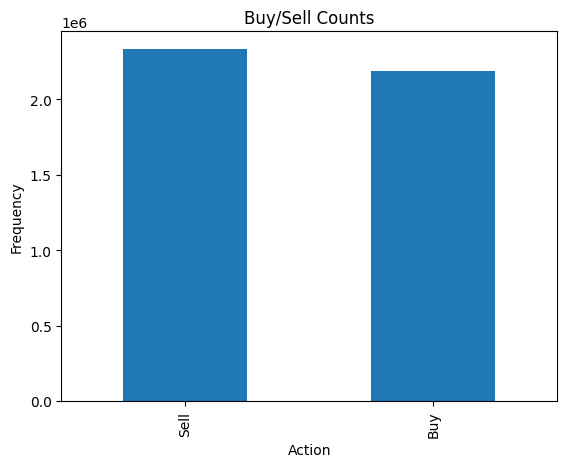

In [13]:
trades["cmd"].map({0:"Buy",1:"Sell"}).value_counts().plot(kind = "bar", title = "Buy/Sell Counts", xlabel = "Action", ylabel = "Frequency")

### Exchange Rate

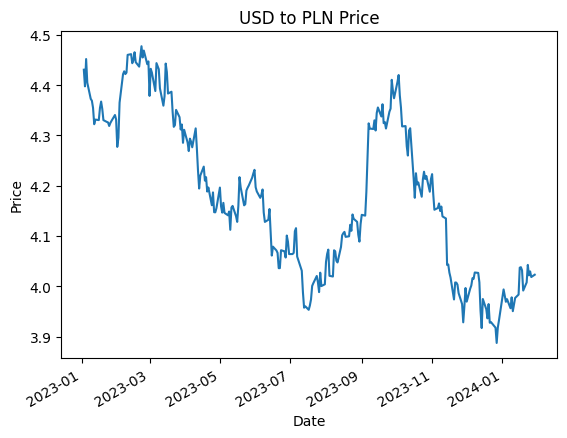

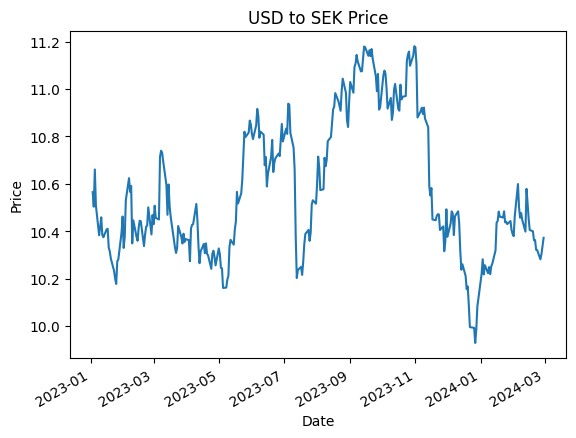

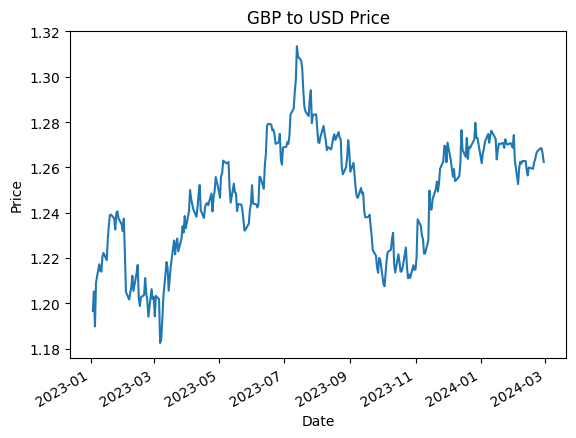

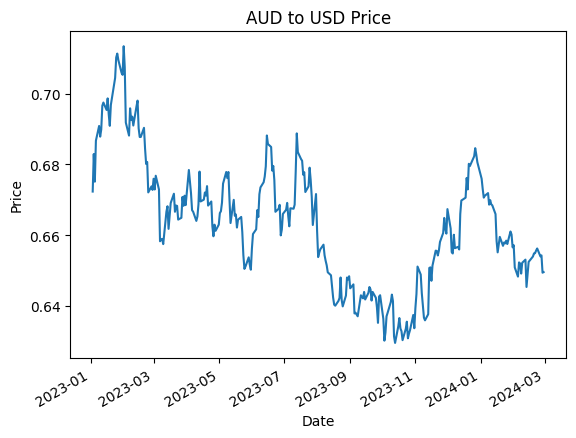

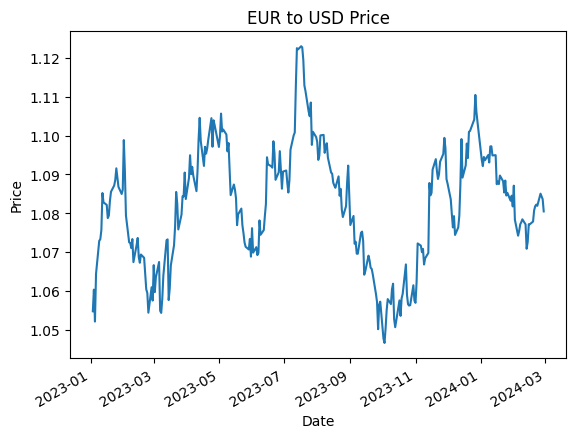

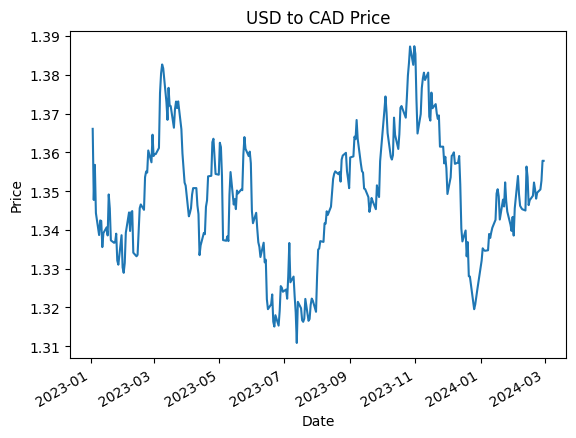

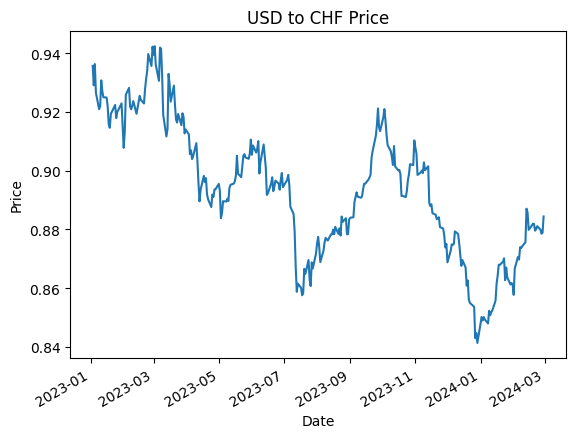

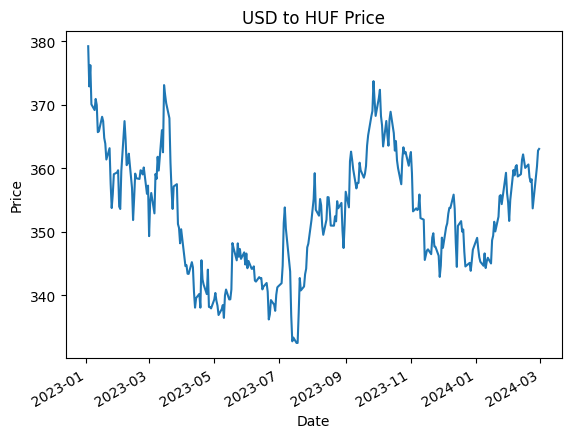

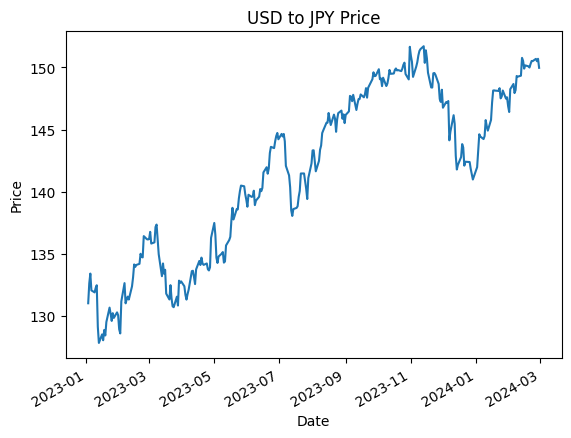

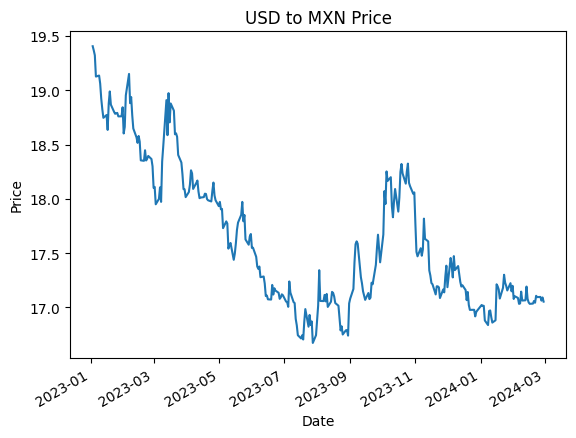

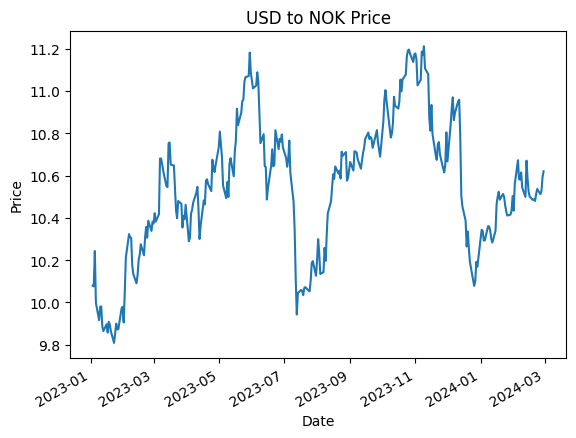

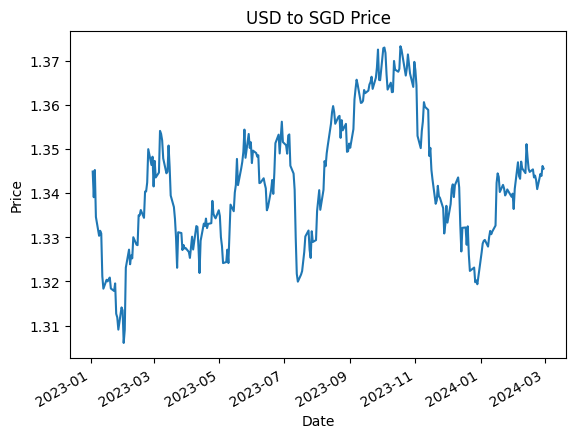

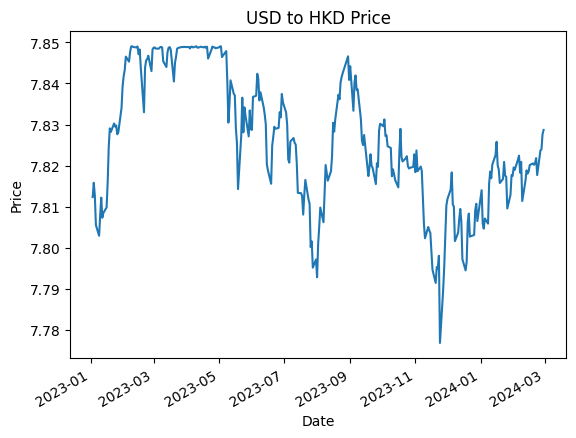

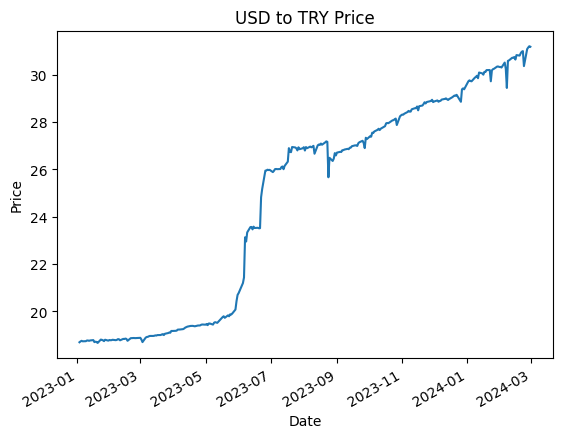

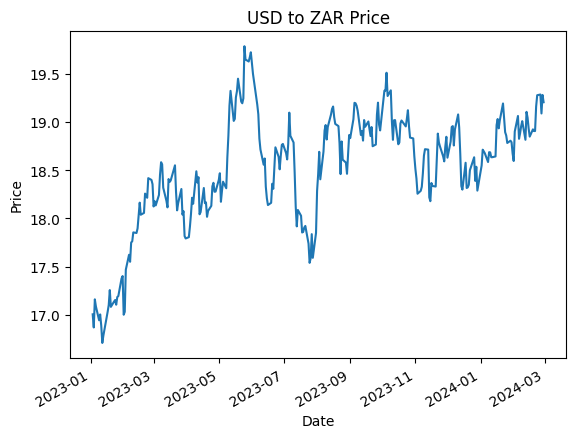

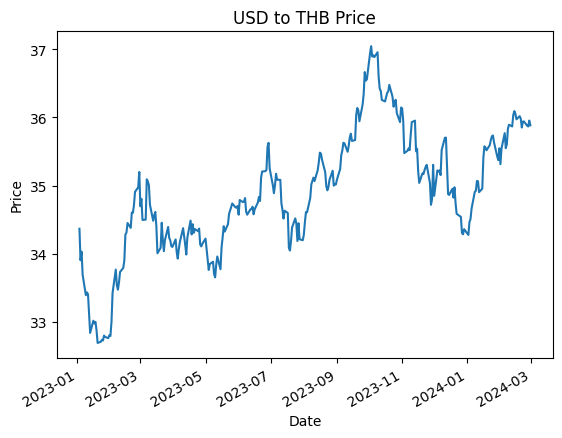

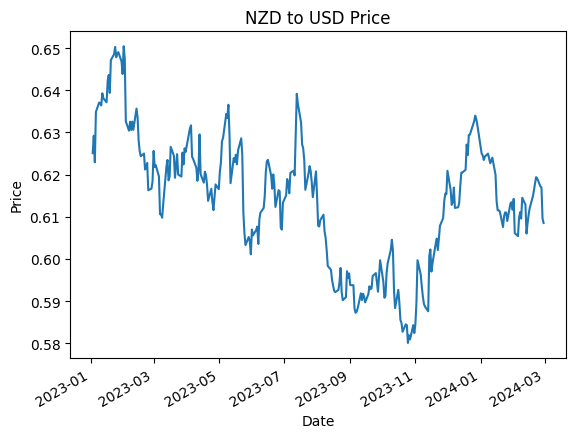

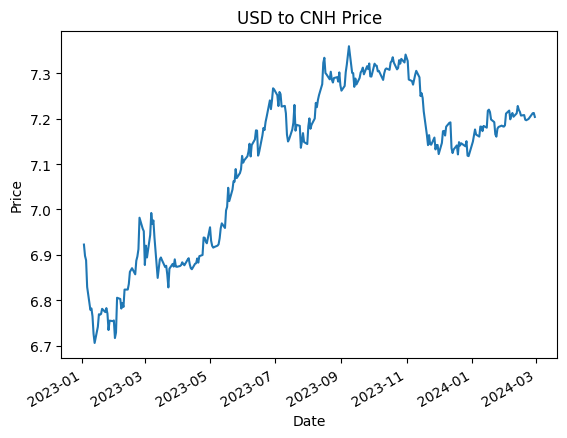

In [14]:
list_of_currency = ["USDPLN", "USDSEK", "GBPUSD","AUDUSD",
                    "EURUSD","USDCAD","USDCHF","USDHUF",
                    "USDJPY","USDMXN","USDNOK","USDSGD",
                    "USDHKD","USDTRY","USDZAR","USDTHB",
                    "NZDUSD","USDCNH"]
for currency in list_of_currency:
  daily_chart[currency]["date"] = pd.to_datetime(daily_chart[currency]['date'])
  daily_chart[currency].plot(x = 'date', y = 'close', title = f"{currency[0:3]} to {currency[3:6]} Price" , xlabel = "Date", ylabel="Price", legend = False)

### Volume Traded

<Axes: >

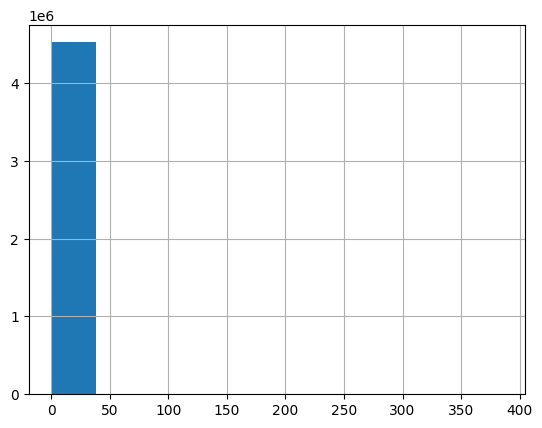

In [15]:
trades["volume"].hist(bins = 10)

### Open Time distribution

<Axes: >

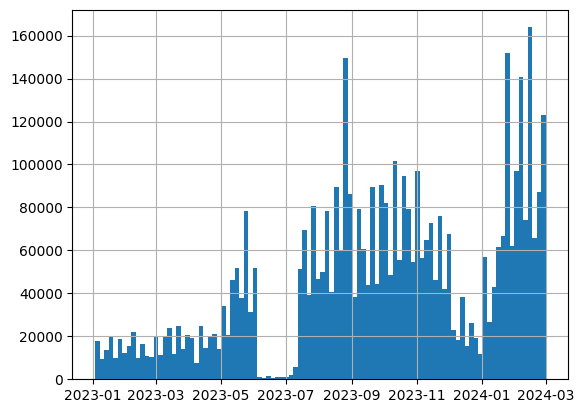

In [16]:
trades["open_time"].hist(bins=100)

<Axes: >

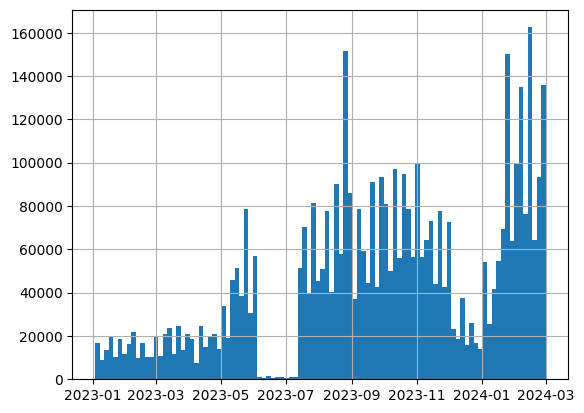

In [17]:
trades["close_time"].hist(bins=100)

### Merge Login, Symbol and Trade

In [18]:
login_trades = pd.merge(login,trades,on="login", how="right")
login_trades_symbol = pd.merge(symbol,login_trades,on="symbol")
login_trades_symbol= login_trades_symbol[[
    "ticket",
    "login",
    "country",
    "account_currency",
    "reg_date",
    "symbol",
    "description",
    "type",
    "cmd",
    "volume",
    "open_time",
    "open_price",
    "close_time",
    "close_price",
    "tp",
    "sl",
    "reason",
    "commission",
    "swaps",
    "profit",
    "volume_usd"
]]
login_trades_symbol.head()


,ticket,login,country,account_currency,reg_date,symbol,description,type,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,68290442,776413,NZ,NZD,2020-05-18 10:56:42,ALUMINIUM,Aluminium vs US Dollar,Commodity,1,0.02,2024-01-29 09:26:50,2252.20,2024-01-29 09:30:01,2259.296,2194.351,2259.296,1,0.0,0.0,-23.23,9022.99
1,67250544,7057685,Canada,CAD,2023-11-16 21:47:33,ALUMINIUM,Aluminium vs US Dollar,Commodity,1,0.10,2023-12-20 16:47:16,2250.40,2023-12-20 17:04:29,2251.300,2249.585,2256.600,6,0.0,0.0,-12.00,45017.00
2,68598425,777838,AU,AUD,2020-07-26 09:16:02,ALUMINIUM,Aluminium vs US Dollar,Commodity,0,0.04,2024-02-06 17:08:33,2241.20,2024-02-06 17:42:37,2238.950,2248.076,0.000,1,0.0,0.0,-13.83,17920.60
3,68600324,777838,AU,AUD,2020-07-26 09:16:02,ALUMINIUM,Aluminium vs US Dollar,Commodity,0,0.06,2024-02-06 17:26:39,2239.75,2024-02-06 17:42:33,2238.950,0.000,0.000,1,0.0,0.0,-7.38,26872.20
4,68600347,777838,AU,AUD,2020-07-26 09:16:02,ALUMINIUM,Aluminium vs US Dollar,Commodity,0,0.09,2024-02-06 17:26:55,2239.40,2024-02-06 17:40:56,2238.250,0.000,0.000,1,0.0,0.0,-15.90,40298.85


### Standardise Country Name

In [19]:
replace = {
    "AE":"United Arab Emirates", "AG": "Antigua and Barbuda", "AL": "Albania", "AR": "Argentina", "AT":"Austria", "AU":"Australia", "AW":"Aruba",
    "BB":"Barbados", "BD":"Bangladesh", "BG": "Bulgaria", "BJ": "Benin", "BN": "Brunei", "BO" : "Bolivia", "BR":"Brazil", "BS":"Bahamas", "Bonaire, Sint E":"Caribbean Netherlands","Bosnia and Herz":"Bosnia and Herzegovina",
    "CA":"Canada", "CH":"Switzerland", "CI":"Côte d'Ivoire", "CL":"Chile","CM":"Cameroon", "CN": "China", "CO":"Colombia", "CR":"Costa Rica", "CZ":"Czechia", "Congo (Republic":"Republic of Congo", "Congo (Republic)":"Republic of Congo",
    "Cote D'ivoire":"Côte d'Ivoire", "Curacao":"Curaçao","CuraÃ§ao":"Curaçao", "Czechia":"Czech Republic",
    "DE":"Germany","DK":"Denmark","DM":"Dominica","DO":"Dominican Republic", "DZ":"Algeria","Dominican Repub":"Dominican Republic",
    "EC":"Ecuador","EE":"Estonia","ES":"Spain",
    "FR":"France", "French Polynesi":"French Polynesia",
    "GB":"United Kingdom","GD":"Grenada","GH":"Ghana","GN":"Guinea","GR":"Greece", "GY":"Guyana",
    "HK":"Hong Kong","HR":"Croatia","HT":"Haiti","HU":"Hungary","Hong Kong S.A.R.": "Hong Kong", "Hong+Kong":"Hong Kong",
    "ID":"Indonesia","IE":"Ireland","IN":"India","IT":"Italy",
    "JM":"Jamaica",
    "KE":"Kenya","KH":"Cambodia", "KN":"Saint Kitts and Nevis", "KR":"South Korea", "KW":"Kuwait", "KZ":"Kazakhstan", "Korea, South" : "South Korea",
    "LC":"Saint Lucia", "LK":"Sri Lanka", "LR":"Liberia", "LS":"Lesotho","LT":"Lithuania", "LV":"Latvia",
    "MA":"Morocco","MD":"Moldova","ME":"Montenegro","MQ":"Martinique", "MT":"Malta","MU":"Mauritius","MV":"Maldives","MX":"Mexico","MY":"Malaysia", "MZ":"Mozambique","Macedonia":"North Macedonia",
    "NC":"New Caledonia","NG":"Nigeria","NL":"Netherlands","NO":"Norway","NZ":"New Zealand",
    "PF":"French Polynesia","PG":"Papua New Guinea","PH":"Philippines","PK":"Pakistan", "PL":"Poland","PT":"Portugal","Palestinian Authority":"Palestine","Papua New Guine":"Papua New Guinea",
    "QA":"Qatar",
    "RE":"Réunion","RO":"Romania","RÃ©union":"Réunion","Reunion":"Réunion",
    "SA":"Saudi Arabia","SE":"Sweden","SG":"Singapore","SI":"Slovenia","SK":"Slovakia","Saint Vincent a":"Saint Vincent and The Grenadine","Sint Maarten (Dutch part)":"Sint Maarten", "Swaziland": "Eswatini",
    "TC":"Turks and Caicos Islands","TH":"Thailand","TW":"Taiwan","Taiwan, China":"Taiwan","Trinidad and To":"Trinidad and Tobago","Turks and Caico":"Turks and Caicos Islands","Turks and Caicos":"Turks and Caicos Islands",
    "UG":"Uganda", "United Arab Emi":"United Arab Emirates","United+Kingdom":"United Kingdom",
    "VI":"Virgin Islands (U.S.)",
    "Wallis and Futu":"Wallis and Futuna",
    "YT":"Mayotte",
    "ZA": "South Africa", "ZM":"Zambia"
    
    
}
login_trades_symbol.replace({"country":replace},inplace=True)
login_trades_symbol.head()

,ticket,login,country,account_currency,reg_date,symbol,description,type,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,68290442,776413,New Zealand,NZD,2020-05-18 10:56:42,ALUMINIUM,Aluminium vs US Dollar,Commodity,1,0.02,2024-01-29 09:26:50,2252.20,2024-01-29 09:30:01,2259.296,2194.351,2259.296,1,0.0,0.0,-23.23,9022.99
1,67250544,7057685,Canada,CAD,2023-11-16 21:47:33,ALUMINIUM,Aluminium vs US Dollar,Commodity,1,0.10,2023-12-20 16:47:16,2250.40,2023-12-20 17:04:29,2251.300,2249.585,2256.600,6,0.0,0.0,-12.00,45017.00
2,68598425,777838,Australia,AUD,2020-07-26 09:16:02,ALUMINIUM,Aluminium vs US Dollar,Commodity,0,0.04,2024-02-06 17:08:33,2241.20,2024-02-06 17:42:37,2238.950,2248.076,0.000,1,0.0,0.0,-13.83,17920.60
3,68600324,777838,Australia,AUD,2020-07-26 09:16:02,ALUMINIUM,Aluminium vs US Dollar,Commodity,0,0.06,2024-02-06 17:26:39,2239.75,2024-02-06 17:42:33,2238.950,0.000,0.000,1,0.0,0.0,-7.38,26872.20
4,68600347,777838,Australia,AUD,2020-07-26 09:16:02,ALUMINIUM,Aluminium vs US Dollar,Commodity,0,0.09,2024-02-06 17:26:55,2239.40,2024-02-06 17:40:56,2238.250,0.000,0.000,1,0.0,0.0,-15.90,40298.85


### Country Count in login_trade_symbol

<Axes: title={'center': 'Top 30 Countries in terms of trade count'}, xlabel='country'>

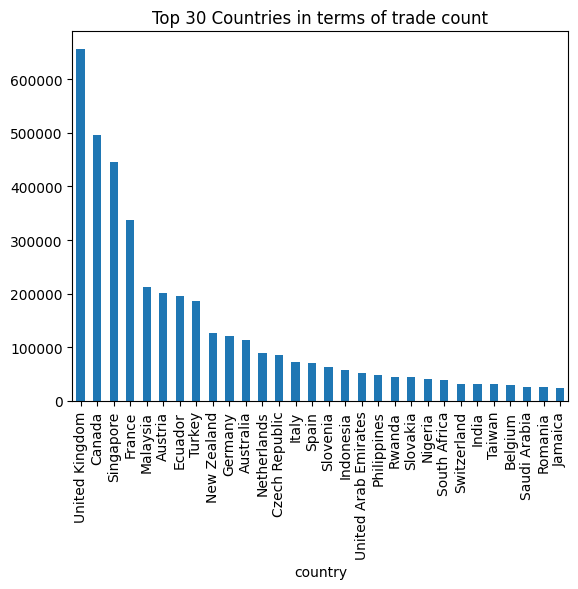

In [20]:
login_trades_symbol["country"].value_counts().iloc[:30].plot(kind = "bar",title="Top 30 Countries in terms of trade count")

<Axes: title={'center': 'Bottom 30 Countries in terms of trade count'}, xlabel='country'>

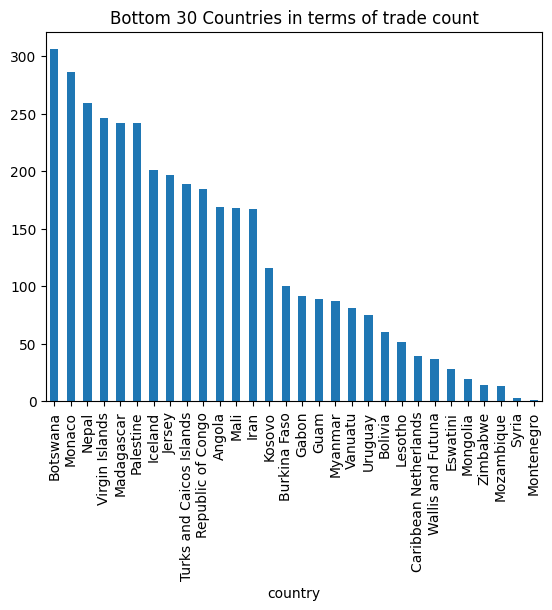

In [21]:
login_trades_symbol["country"].value_counts().iloc[-30:].plot(kind = "bar",title="Bottom 30 Countries in terms of trade count")

### Currency conversion

In [22]:
def currency_conversion(row, target, time="close_time"):
    if row["account_currency"] == "EUR":
        euro_date = daily_chart["EURUSD"].loc[:,["date"]]
        rate = daily_chart["EURUSD"]["close"].loc[euro_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "GBP":
        gbp_date = daily_chart["GBPUSD"].loc[:,["date"]]
        rate = daily_chart["GBPUSD"]["close"].loc[gbp_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "USD":
        return target
    if row["account_currency"] == "SGD":
        sgd_date = daily_chart["USDSGD"].loc[:,["date"]]
        rate = daily_chart["USDSGD"]["close"].loc[sgd_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)
    if row["account_currency"] == "CAD":
        cad_date = daily_chart["USDCAD"].loc[:,["date"]]
        rate = daily_chart["USDCAD"]["close"].loc[cad_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)
    if row["account_currency"] == "AUD":
        aud_date = daily_chart["AUDUSD"].loc[:,["date"]]
        rate = daily_chart["AUDUSD"]["close"].loc[aud_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "NZD":
        nzd_date = daily_chart["NZDUSD"].loc[:,["date"]]
        rate = daily_chart["NZDUSD"]["close"].loc[nzd_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "CHF":
        chf_date = daily_chart["USDCHF"].loc[:,["date"]]
        rate = daily_chart["USDCHF"]["close"].loc[chf_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)

In [23]:
# login_trades_symbol['commission_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["commission"] ), axis=1)
# login_trades_symbol['swaps_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["swaps"] ), axis=1)
# login_trades_symbol['profit_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["profit"] ), axis=1)
# login_trades_symbol['open_price_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["open_price"],time="open_time" ), axis=1)
# login_trades_symbol['close_price_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["close_price"] ), axis=1)
# login_trades_symbol['tp_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["tp"] ), axis=1)
# login_trades_symbol['sl_usd'] = login_trades_symbol.apply(lambda row:currency_conversion(row, row["sl"] ), axis=1)
# login_trades_symbol.head()

### Calculate DPM

In [24]:
# ippu = login_trades_symbol["volume"]/login_trades_symbol["volume_usd"]
# vim = ippu * 1000000
# dpm = login_trades_symbol["profit_usd"]/vim
# login_trades_symbol = pd.concat([login_trades_symbol, dpm.rename("dpm")], axis=1)

In [25]:
# The above code is run in somewhere else since run out of ram, the following is the result

In [26]:
login_trades_symbol_usd = pd.read_csv("login_trades_symbol_updated_tpsl.csv")
login_trades_symbol_usd['reg_date'] = pd.to_datetime(login_trades_symbol_usd['reg_date'], format='%Y-%m-%d %H:%M:%S')
login_trades_symbol_usd['open_time'] = pd.to_datetime(login_trades_symbol_usd['open_time'], format='%Y-%m-%d %H:%M:%S')
login_trades_symbol_usd['close_time'] = pd.to_datetime(login_trades_symbol_usd['close_time'], format='%Y-%m-%d %H:%M:%S')
login_trades_symbol_usd.head()

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,open_price_usd,close_time,close_price_usd,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm,tp_usd,sl_usd
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 17:05:41,1991.3500,2135.902096,2024-02-15 16:05:14,2157.542221,0.0,0.0,1,0.0,0.0,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634,0.0,0.0
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:08:49,1990.3000,2134.775877,2024-02-15 16:05:10,2157.272934,0.0,0.0,1,0.0,0.0,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405,0.0,0.0
2,7062462,Latvia,EUR,2023-12-22 18:51:59,68879706,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:00:10,1995.3800,2140.224634,2024-02-15 14:49:53,2152.985877,0.0,0.0,1,0.0,0.0,-2.25,-2.423588,6.33,6.818360,7988.32,2.723362,0.0,0.0
3,7062462,Latvia,EUR,2023-12-22 18:51:59,68873155,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 16:00:08,2003.2100,2148.623014,2024-02-15 16:05:29,2157.402192,0.0,0.0,1,0.0,0.0,-1.12,-1.206408,-0.30,-0.323145,4006.09,-0.129455,0.0,0.0
4,7060285,Germany,EUR,2023-12-07 16:33:42,68857433,USDCHF,US Dollar vs Swiss Franc,Forex,0,0.03,2024-02-13 12:33:06,0.8795,0.943343,2024-02-13 13:08:17,0.944265,0.0,0.0,1,0.0,0.0,0.00,0.000000,2.72,2.917445,4683.09,0.455422,0.0,0.0


### Top 10 country with the highest average DPM

<Axes: title={'center': 'Top 10 country with the highest average DPM'}, xlabel='Country', ylabel='Dollar per Million'>

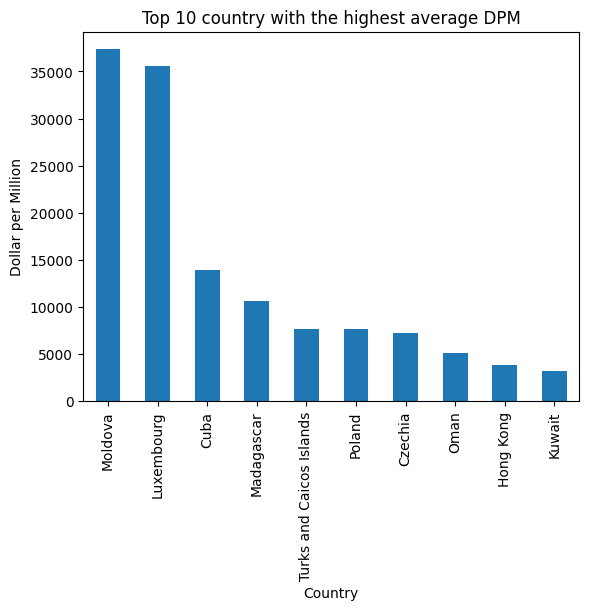

In [27]:
login_trades_symbol_usd.groupby(["country"])["dpm"].mean().nlargest(10).plot(kind = "bar", title = "Top 10 country with the highest average DPM", xlabel = "Country", ylabel = "Dollar per Million")

### Top 10 country with the lowest average DPM

<Axes: title={'center': 'Top 10 country with the lowest average DPM'}, xlabel='Country', ylabel='Dollar per Million'>

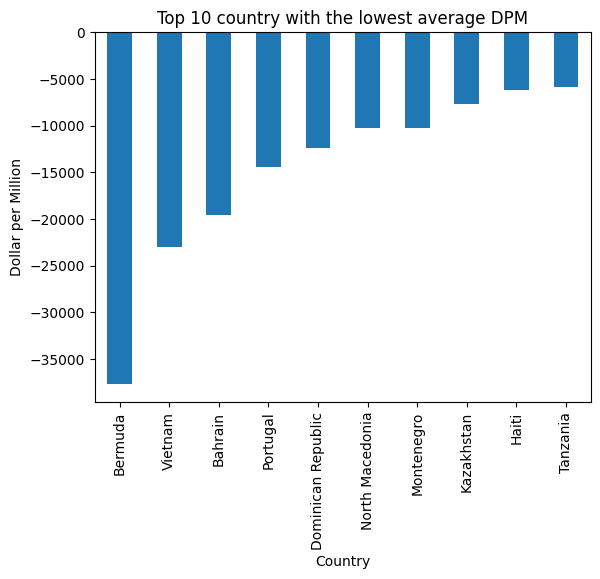

In [28]:
login_trades_symbol_usd.groupby(["country"])["dpm"].mean().nsmallest(10).plot(kind = "bar", title = "Top 10 country with the lowest average DPM", xlabel = "Country", ylabel = "Dollar per Million")

### Top 10 Symbols with the highest DPM

<Axes: title={'center': 'Top 10 symbol with the highest average DPM'}, xlabel='Symbol', ylabel='Dollar per Million'>

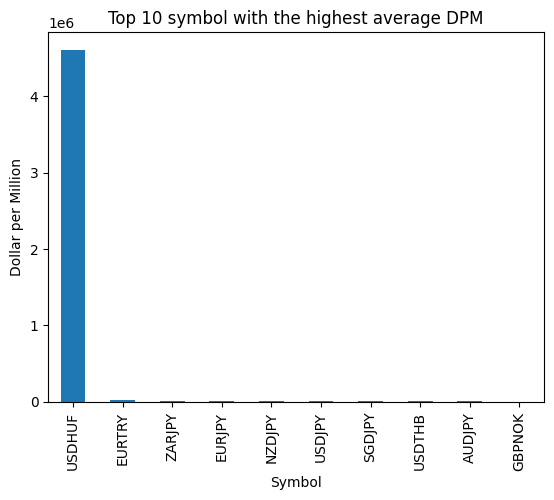

In [29]:
login_trades_symbol_usd.groupby(["symbol"])["dpm"].mean().nlargest(10).plot(kind = "bar", title = "Top 10 symbol with the highest average DPM", xlabel = "Symbol", ylabel = "Dollar per Million")

### Top 10 Symbols with the lowest DPM

<Axes: title={'center': 'Top 10 symbol with the lowest average DPM'}, xlabel='Symbol', ylabel='Dollar per Million'>

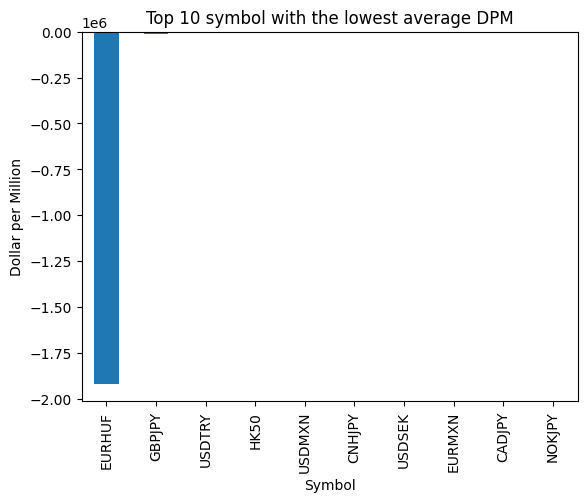

In [30]:
login_trades_symbol_usd.groupby(["symbol"])["dpm"].mean().nsmallest(10).plot(kind = "bar", title = "Top 10 symbol with the lowest average DPM", xlabel = "Symbol", ylabel = "Dollar per Million")

### Reason Count

<Axes: title={'center': 'reason Count Plot'}, xlabel='reason', ylabel='Frequency'>

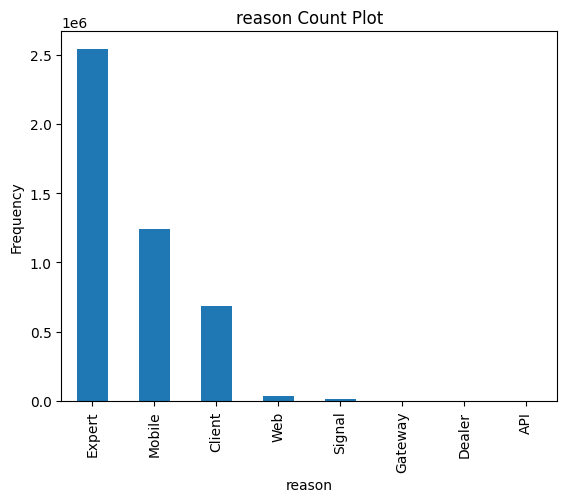

In [31]:
login_trades_symbol_usd.replace({"reason":{0:"Client",1:"Expert",2:"Dealer",3:"Signal",4:"Gateway",5:"Mobile",6:"Web",7:"API"}})["reason"].value_counts().plot(kind="bar", xlabel="reason",ylabel="Frequency", title="reason Count Plot")

### Distribution of volume_usd

<Axes: >

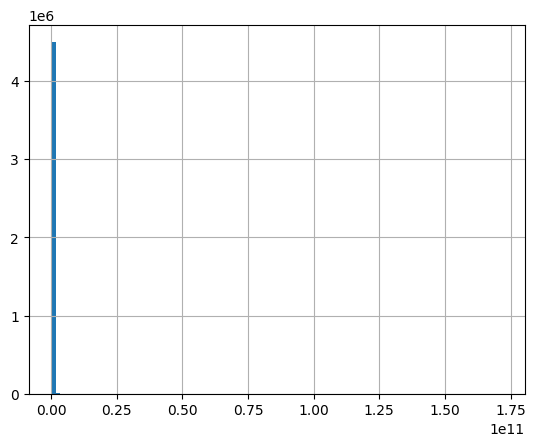

In [32]:
login_trades_symbol_usd["volume_usd"].hist(bins=100)

### Distribution of DPM

<Axes: >

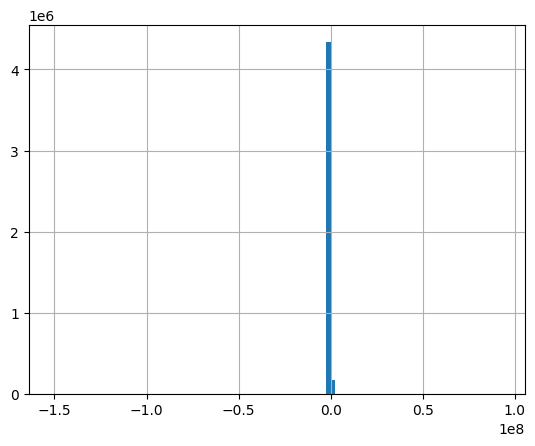

In [33]:
login_trades_symbol_usd["dpm"].hist(bins=100)

## Data Preprocessing

In [34]:
login_trades_symbol_usd['reg_date'] = login_trades_symbol_usd['reg_date'].astype(int) // 10**9
login_trades_symbol_usd['open_time'] = login_trades_symbol_usd['open_time'].astype(int) // 10**9
login_trades_symbol_usd['close_time'] = login_trades_symbol_usd['close_time'].astype(int) // 10**9

### Min Max Scaling

In [35]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
login_trades_symbol_usd[["volume"]] = scaler.fit_transform(login_trades_symbol_usd[["volume"]])
login_trades_symbol_usd[["open_price_usd"]] = scaler.fit_transform(login_trades_symbol_usd[["open_price_usd"]])
login_trades_symbol_usd[["tp_usd"]] = scaler.fit_transform(login_trades_symbol_usd[["tp_usd"]])
login_trades_symbol_usd[["sl_usd"]] = scaler.fit_transform(login_trades_symbol_usd[["sl_usd"]])
login_trades_symbol_usd[["reg_date"]] = scaler.fit_transform(login_trades_symbol_usd[["reg_date"]])
login_trades_symbol_usd[["open_time"]] = scaler.fit_transform(login_trades_symbol_usd[["open_time"]])

In [36]:
login_trades_symbol_usd.head()

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,open_price_usd,close_time,close_price_usd,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm,tp_usd,sl_usd
0,7062462,Latvia,EUR,0.978239,68880703,XAUUSD,Gold vs US Dollar,Metal,0,0.000026,0.961509,1991.3500,0.026408,1708013114,2157.542221,0.0,0.0,1,0.0,0.0,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634,0.0,0.0
1,7062462,Latvia,EUR,0.978239,68880910,XAUUSD,Gold vs US Dollar,Metal,0,0.000052,0.961515,1990.3000,0.026394,1708013110,2157.272934,0.0,0.0,1,0.0,0.0,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405,0.0,0.0
2,7062462,Latvia,EUR,0.978239,68879706,XAUUSD,Gold vs US Dollar,Metal,0,0.000052,0.961500,1995.3800,0.026461,1708008593,2152.985877,0.0,0.0,1,0.0,0.0,-2.25,-2.423588,6.33,6.818360,7988.32,2.723362,0.0,0.0
3,7062462,Latvia,EUR,0.978239,68873155,XAUUSD,Gold vs US Dollar,Metal,0,0.000026,0.961402,2003.2100,0.026565,1708013129,2157.402192,0.0,0.0,1,0.0,0.0,-1.12,-1.206408,-0.30,-0.323145,4006.09,-0.129455,0.0,0.0
4,7060285,Germany,EUR,0.972593,68857433,USDCHF,US Dollar vs Swiss Franc,Forex,0,0.000078,0.961062,0.8795,0.000011,1707829697,0.944265,0.0,0.0,1,0.0,0.0,0.00,0.000000,2.72,2.917445,4683.09,0.455422,0.0,0.0


### Remove Outliers

<Axes: >

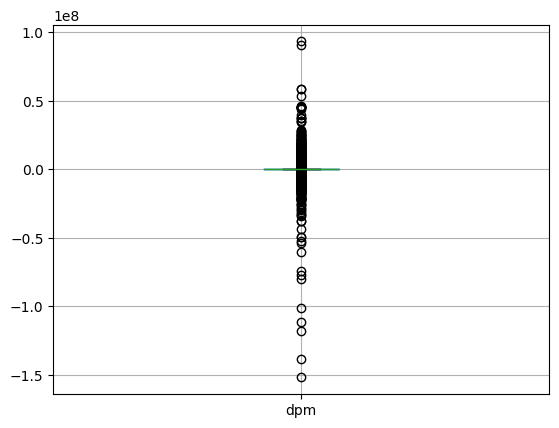

In [37]:
login_trades_symbol_usd.boxplot(column=["dpm"])

<Axes: >

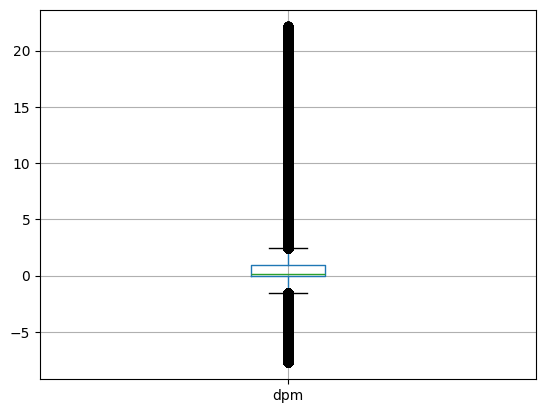

In [38]:
#if we need to remove all outliers, we need to remove nearly top 25% and bottom 25% data, so we decide to keep some of them
q_low = login_trades_symbol_usd["dpm"].quantile(0.10)
q_hi  = login_trades_symbol_usd["dpm"].quantile(0.90)

login_trades_symbol_usd = login_trades_symbol_usd[(login_trades_symbol_usd["dpm"] < q_hi) & (login_trades_symbol_usd["dpm"] > q_low)]
login_trades_symbol_usd.boxplot(column=["dpm"])

### Feature Selection

In [39]:
login_trades_symbol_usd.drop(columns= ["description","login","ticket","open_price","close_time", "close_price_usd","commission","commission_usd","swaps","swaps_usd","profit","profit_usd","volume_usd"],inplace=True)
login_trades_symbol_usd = login_trades_symbol_usd[["country","account_currency","reg_date","symbol","type","cmd","volume","open_time","open_price_usd","tp_usd","sl_usd","reason","dpm"]]
login_trades_symbol_usd.head()

,country,account_currency,reg_date,symbol,type,cmd,volume,open_time,open_price_usd,tp_usd,sl_usd,reason,dpm
0,Latvia,EUR,0.978239,XAUUSD,Metal,0,0.000026,0.961509,0.026408,0.0,0.0,1,4.659634
1,Latvia,EUR,0.978239,XAUUSD,Metal,0,0.000052,0.961515,0.026394,0.0,0.0,1,9.961405
2,Latvia,EUR,0.978239,XAUUSD,Metal,0,0.000052,0.961500,0.026461,0.0,0.0,1,2.723362
3,Latvia,EUR,0.978239,XAUUSD,Metal,0,0.000026,0.961402,0.026565,0.0,0.0,1,-0.129455
4,Germany,EUR,0.972593,USDCHF,Forex,0,0.000078,0.961062,0.000011,0.0,0.0,1,0.455422


### Visualise the data after MinMax Scaling

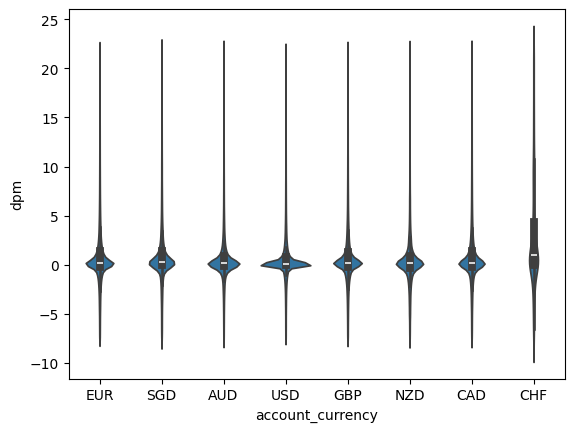

In [40]:
import seaborn as sns
sns.violinplot(login_trades_symbol_usd, x="account_currency",y="dpm")
plt.show()

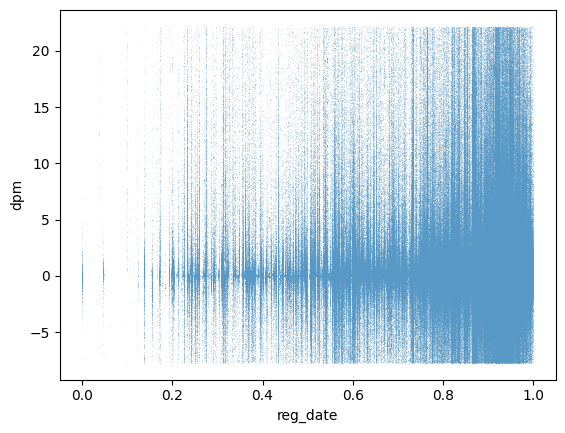

In [41]:
sns.scatterplot(login_trades_symbol_usd, x="reg_date",y="dpm",s=0.1)
plt.show()

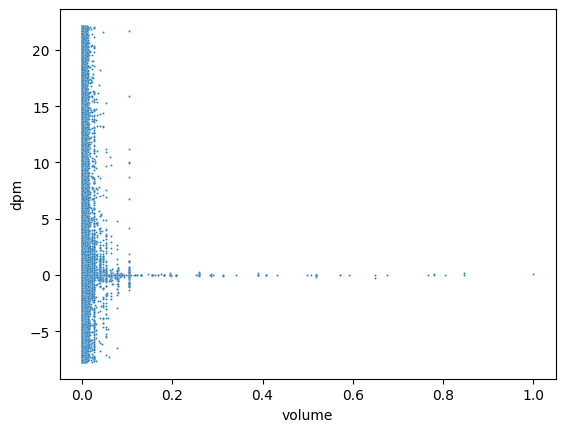

In [42]:
sns.scatterplot(login_trades_symbol_usd, x="volume",y="dpm", s= 2)
plt.show()

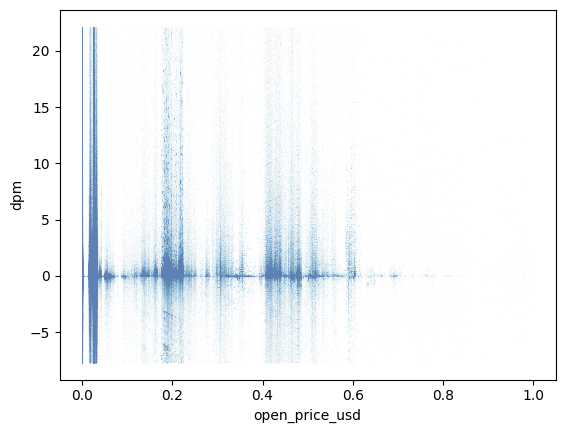

In [43]:
sns.scatterplot(login_trades_symbol_usd,x="open_price_usd",y="dpm",s=0.01)
plt.show()

/tmp/ipykernel_26776/2441029322.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


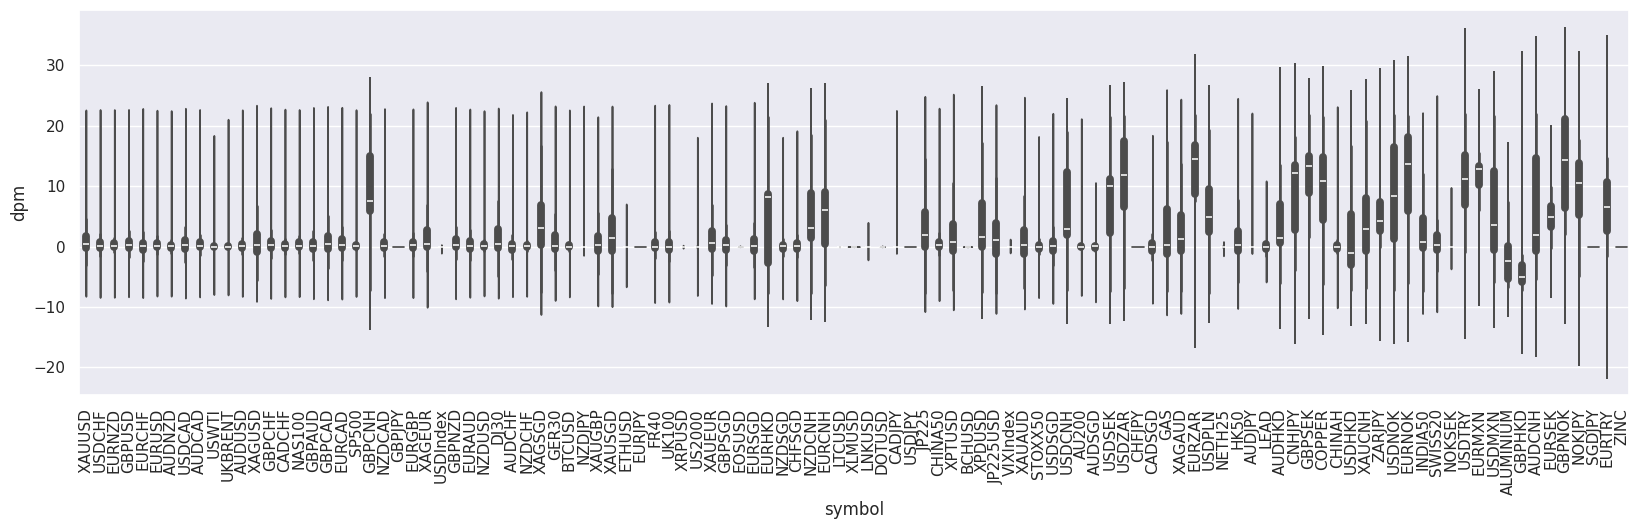

In [44]:
sns.set(rc = {'figure.figsize':(20, 5)})
plot = sns.violinplot(login_trades_symbol_usd, x="symbol",y="dpm")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

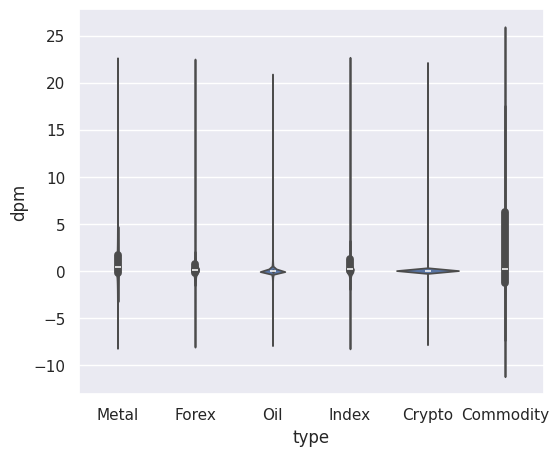

In [45]:
sns.set(rc = {'figure.figsize':(6, 5)})
sns.violinplot(login_trades_symbol_usd, x="type",y="dpm")
plt.show()

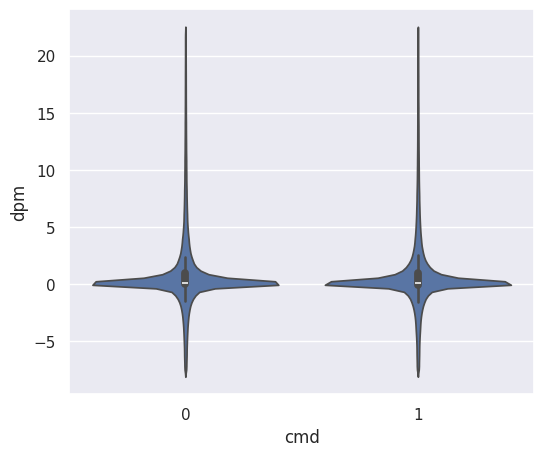

In [46]:
sns.violinplot(login_trades_symbol_usd, x="cmd",y="dpm")
plt.show()

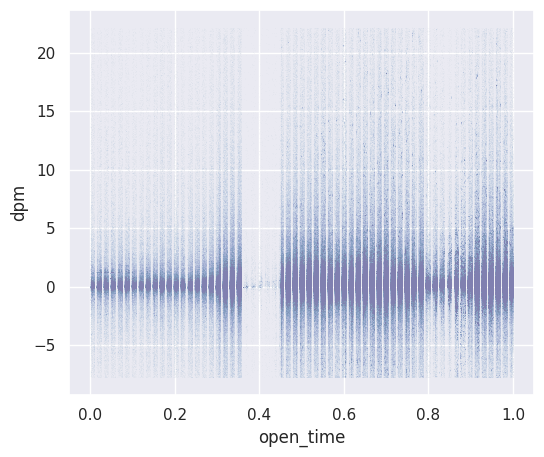

In [47]:
sns.scatterplot(login_trades_symbol_usd, x="open_time",y="dpm",s=0.01)
plt.show()

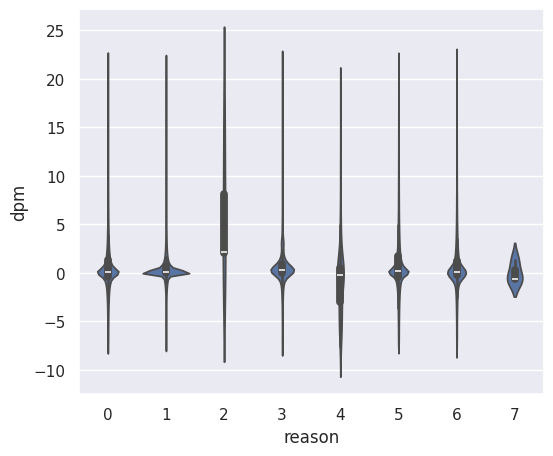

In [48]:
sns.violinplot(login_trades_symbol_usd, x="reason",y="dpm")
plt.show()

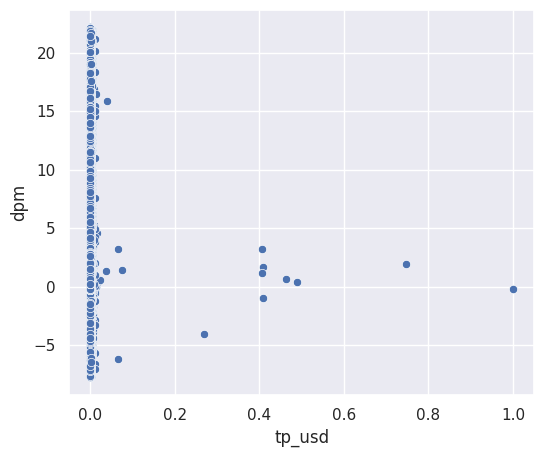

In [49]:
sns.scatterplot(login_trades_symbol_usd, x="tp_usd",y="dpm")
plt.show()

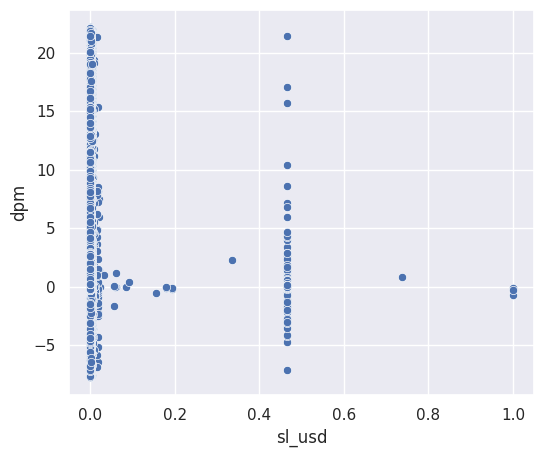

In [50]:
sns.scatterplot(login_trades_symbol_usd, x="sl_usd",y="dpm")
plt.show()

### Label Encoding

In [51]:
label_encoder = preprocessing.LabelEncoder()
login_trades_symbol_usd["country"]= label_encoder.fit_transform(login_trades_symbol_usd["country"])
login_trades_symbol_usd["account_currency"]= label_encoder.fit_transform(login_trades_symbol_usd["account_currency"])
login_trades_symbol_usd["symbol"]= label_encoder.fit_transform(login_trades_symbol_usd["symbol"])
login_trades_symbol_usd["type"]= label_encoder.fit_transform(login_trades_symbol_usd["type"])
login_trades_symbol_usd.head()

,country,account_currency,reg_date,symbol,type,cmd,volume,open_time,open_price_usd,tp_usd,sl_usd,reason,dpm
0,86,3,0.978239,102,4,0,0.000026,0.961509,0.026408,0.0,0.0,1,4.659634
1,86,3,0.978239,102,4,0,0.000052,0.961515,0.026394,0.0,0.0,1,9.961405
2,86,3,0.978239,102,4,0,0.000052,0.961500,0.026461,0.0,0.0,1,2.723362
3,86,3,0.978239,102,4,0,0.000026,0.961402,0.026565,0.0,0.0,1,-0.129455
4,58,3,0.972593,79,2,0,0.000078,0.961062,0.000011,0.0,0.0,1,0.455422


## Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X = login_trades_symbol_usd.iloc[:,0:-1]
y = login_trades_symbol_usd.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

## Modelling 

### Neural Network

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
reg = MLPRegressor()
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X, y.values.ravel(), cv=kf)
print(f"Cross_Validation_Accuracy: {cross_val_results.mean()}")
reg.fit(X_train, y_train.values.ravel())

Cross_Validation_Accuracy: 0.13599753494213554


MLPRegressor()

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

10.675251969528535

In [55]:
mean_absolute_error(y_test,y_pred)

1.867448369801089

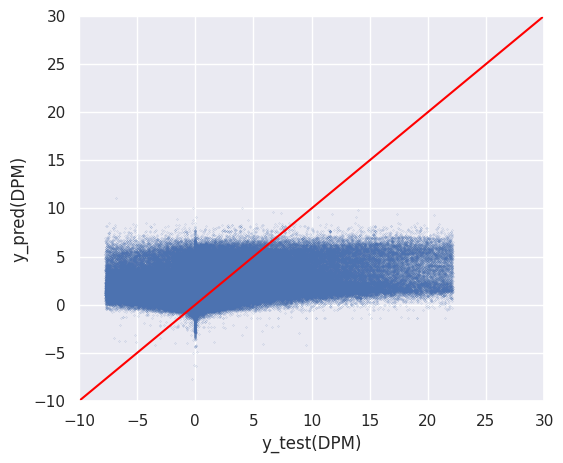

In [56]:
import matplotlib.lines as mlines
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred,s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X, y.values.ravel(), cv=kf)
print(f"Cross_Validation_Accuracy: {cross_val_results.mean()}")
reg.fit(X_train, y_train.values.ravel())

Cross_Validation_Accuracy: 0.015029244616069715


LinearRegression()

In [60]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

12.347247642274427

In [61]:
mean_absolute_error(y_test,y_pred)

1.9595673754142842

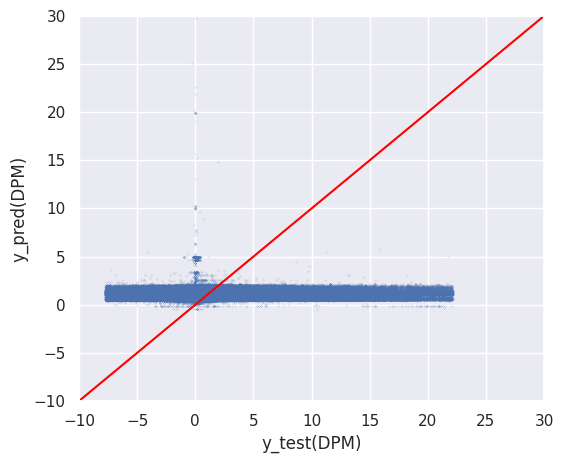

In [62]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred,s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X, y.values.ravel(), cv=kf)
print(f"Cross_Validation_Accuracy: {cross_val_results.mean()}")
reg.fit(X_train, y_train.values.ravel())

Cross_Validation_Accuracy: 0.4641209903615196


RandomForestRegressor()

In [64]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

6.7824888548757

In [65]:
mean_absolute_error(y_test,y_pred)

1.1657508642815537

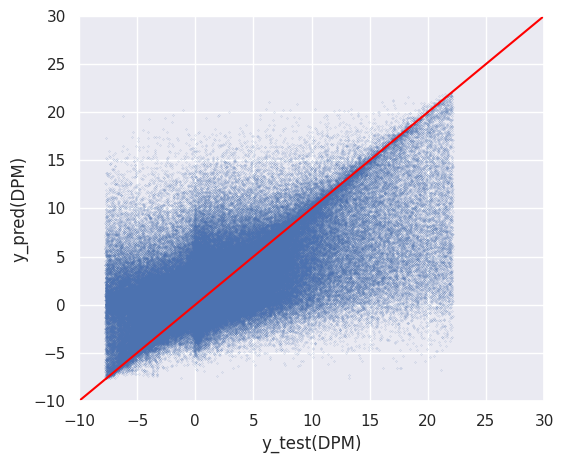

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

### XGBoost

In [67]:
from xgboost import XGBRegressor
reg = XGBRegressor()
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X, y.values.ravel(), cv=kf)
print(f"Cross_Validation_Accuracy: {cross_val_results.mean()}")
reg.fit(X_train, y_train.values.ravel())

Cross_Validation_Accuracy: 0.29858002860367183


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

8.767757281512043

In [69]:
mean_absolute_error(y_test,y_pred)

1.5429942589570025

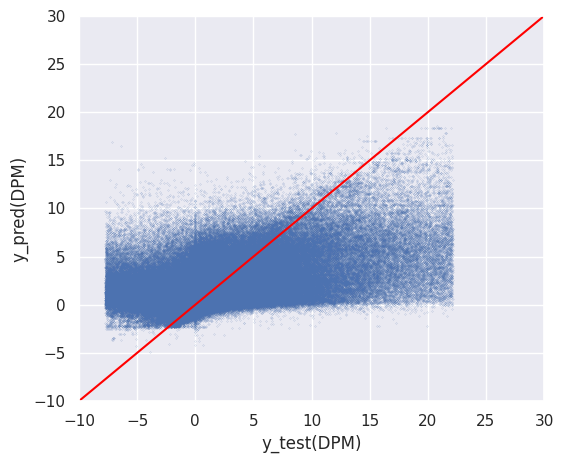

In [70]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

### KNN

In [71]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X, y.values.ravel(), cv=kf)
print(f"Cross_Validation_Accuracy: {cross_val_results.mean()}")
reg.fit(X_train, y_train.values.ravel())

Cross_Validation_Accuracy: 0.26363754673894235


KNeighborsRegressor()

In [72]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

9.303881077396255

In [73]:
mean_absolute_error(y_test,y_pred)

1.5295368763833979

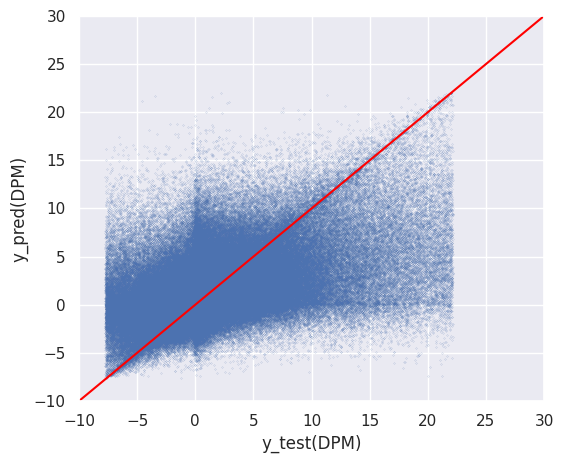

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()